# Ejercicios y Problemas.

2. Descargue MEPX, https://www.mepx.org/, estúdielo y corra uno de los ejemplos que trae.

![./imgs/Screenshot from 2023-09-13 10-10-41.png](<attachment:Screenshot from 2023-09-13 10-10-41.png>)
![./imgs/Screenshot from 2023-09-13 10-11-01.png](<attachment:Screenshot from 2023-09-13 10-11-01.png>)
![./imgs/Screenshot from 2023-09-13 10-19-54.png](<attachment:Screenshot from 2023-09-13 10-19-54.png>)
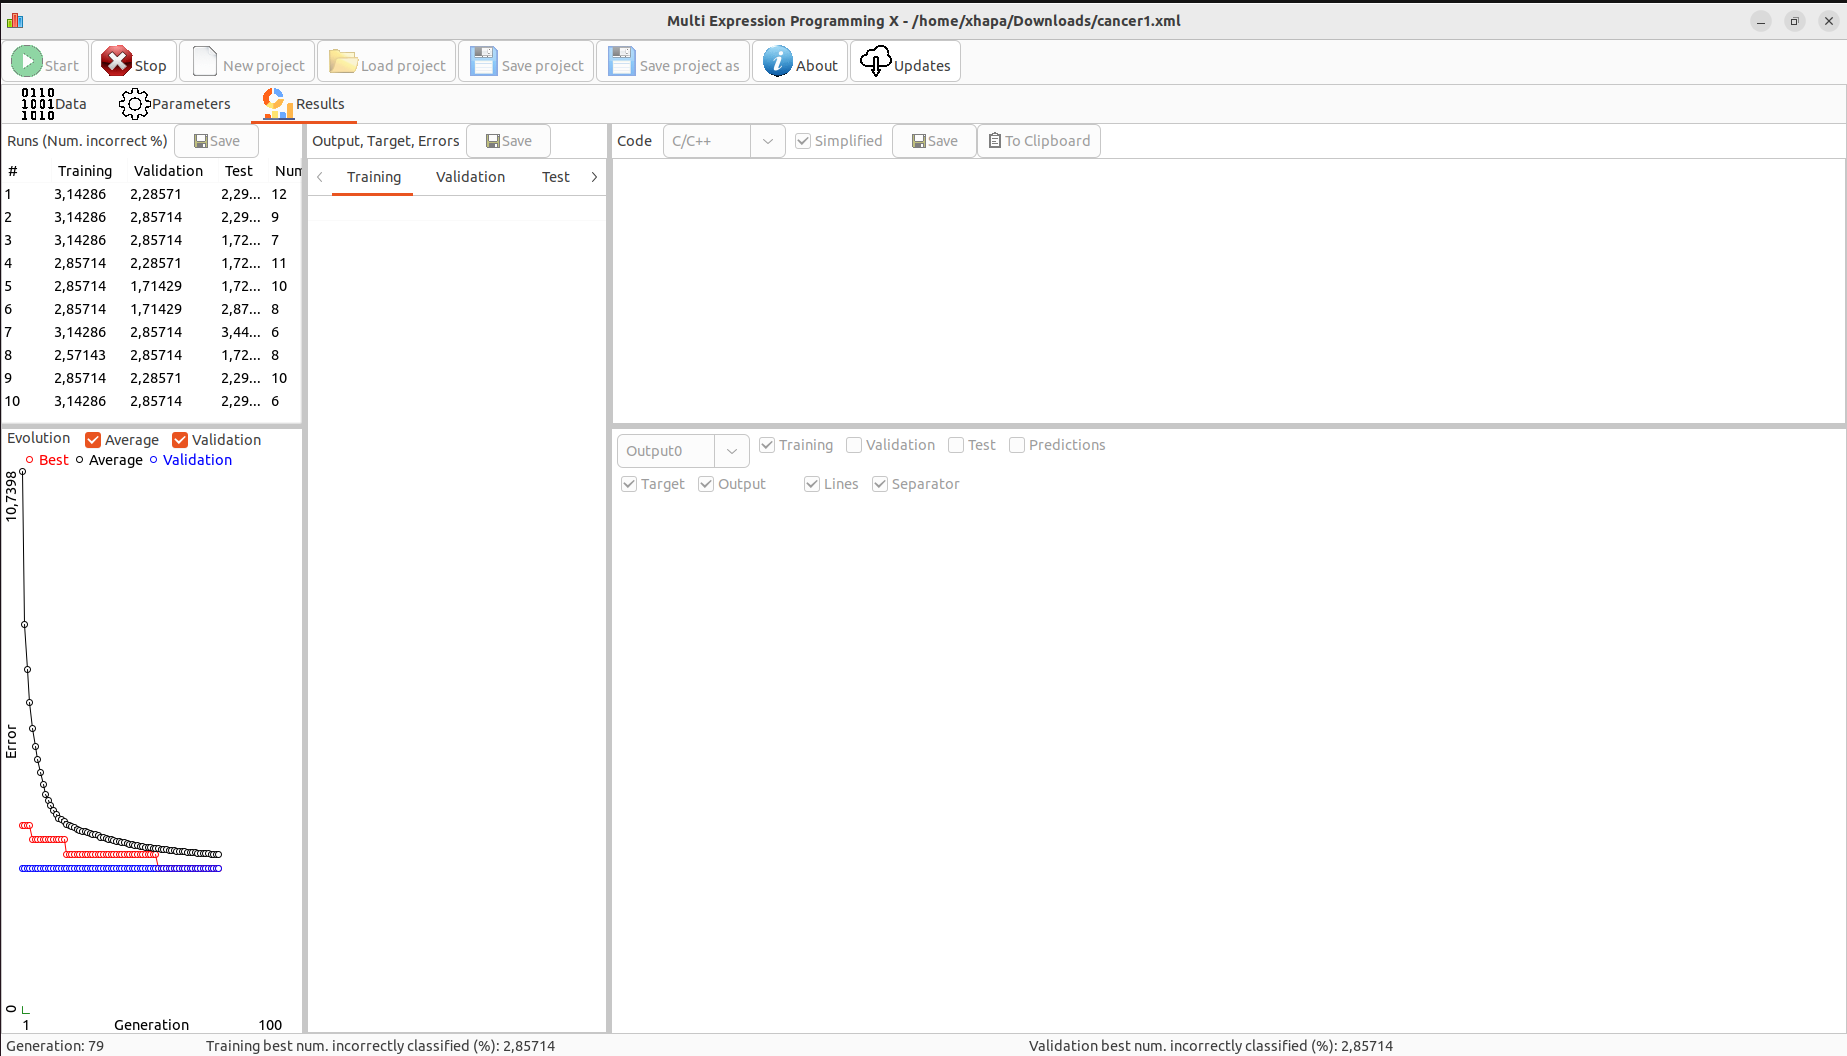
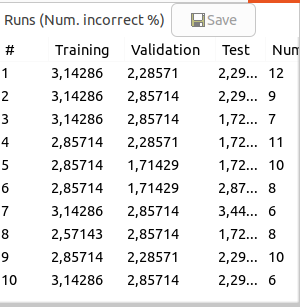
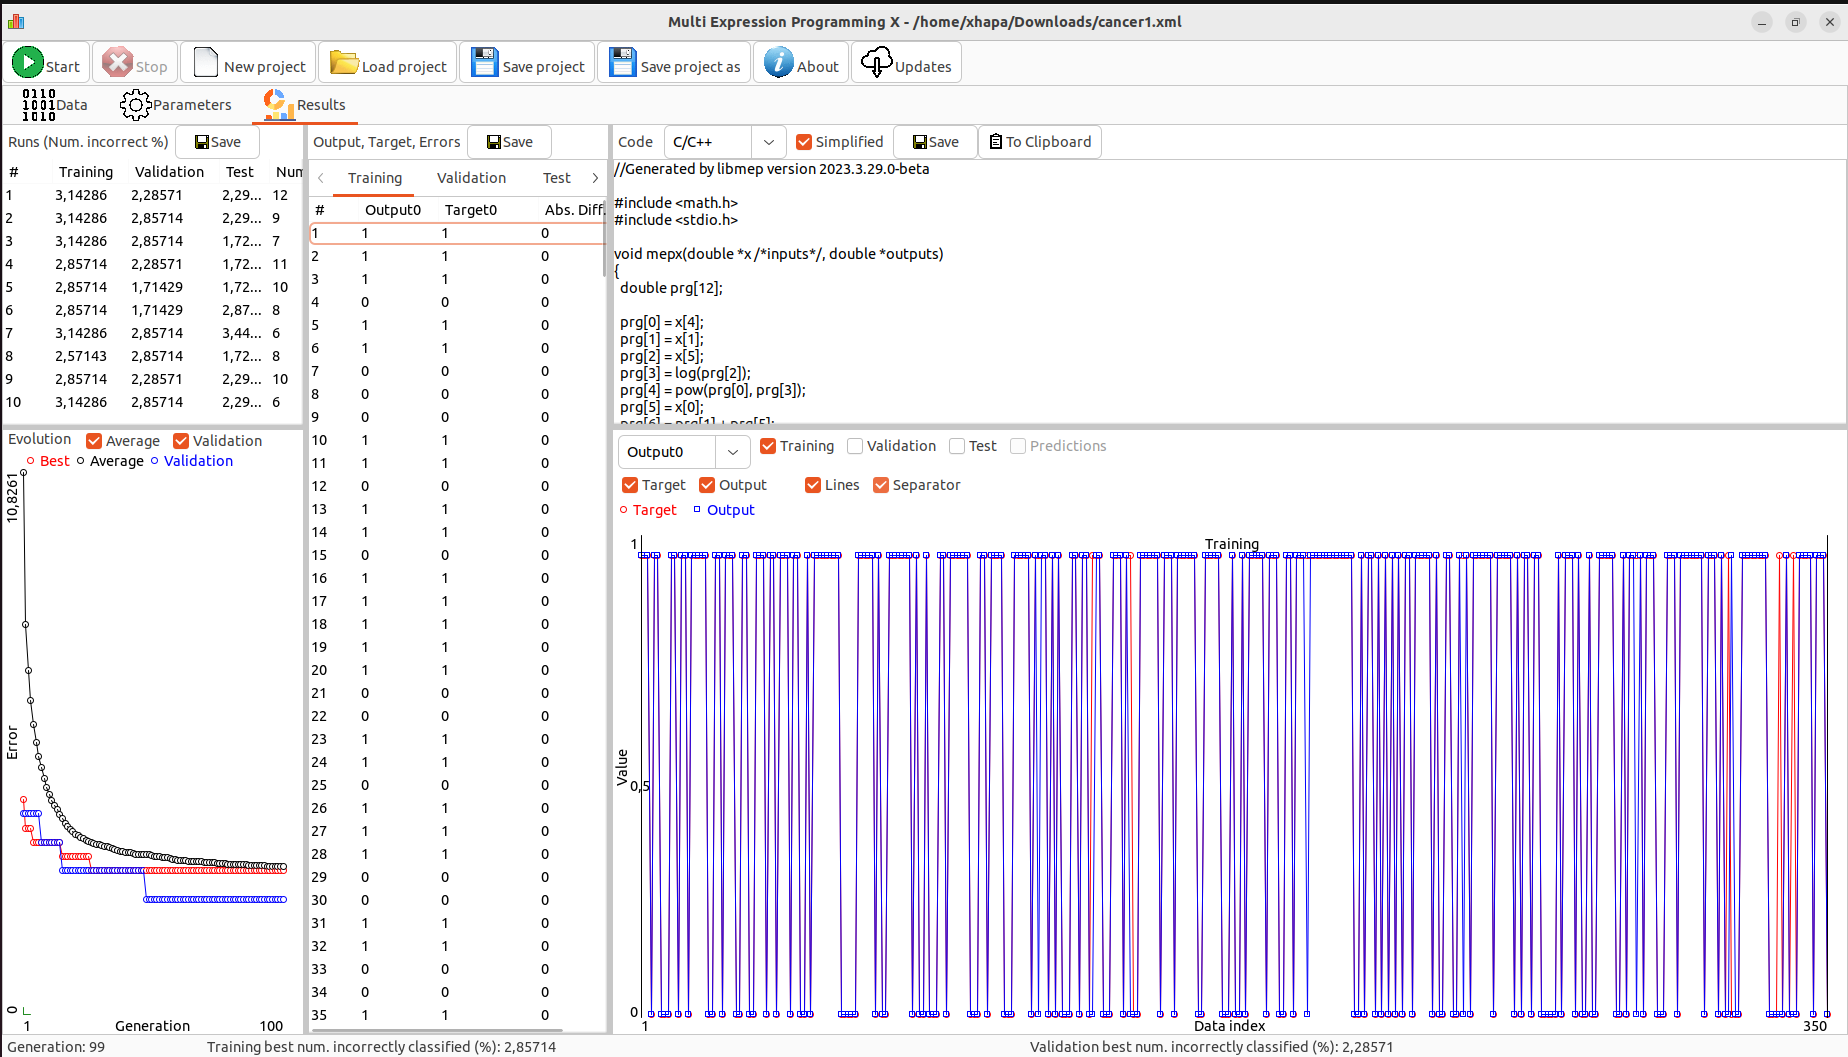

3. Suponga que el valor de la TRM depende del valor de acción de Ecopetrol, del valor de la
acción del Banco de Colombia y del precio del barril de petróleo. Utilice MEPX para
encontrar una fórmula que calcule la TRM para el día siguiente. Para el aprendizaje utilice
60 datos de cada componente.

![./imgs/Screenshot from 2023-09-13 11-56-13.png](<attachment:Screenshot from 2023-09-13 11-56-13.png>)
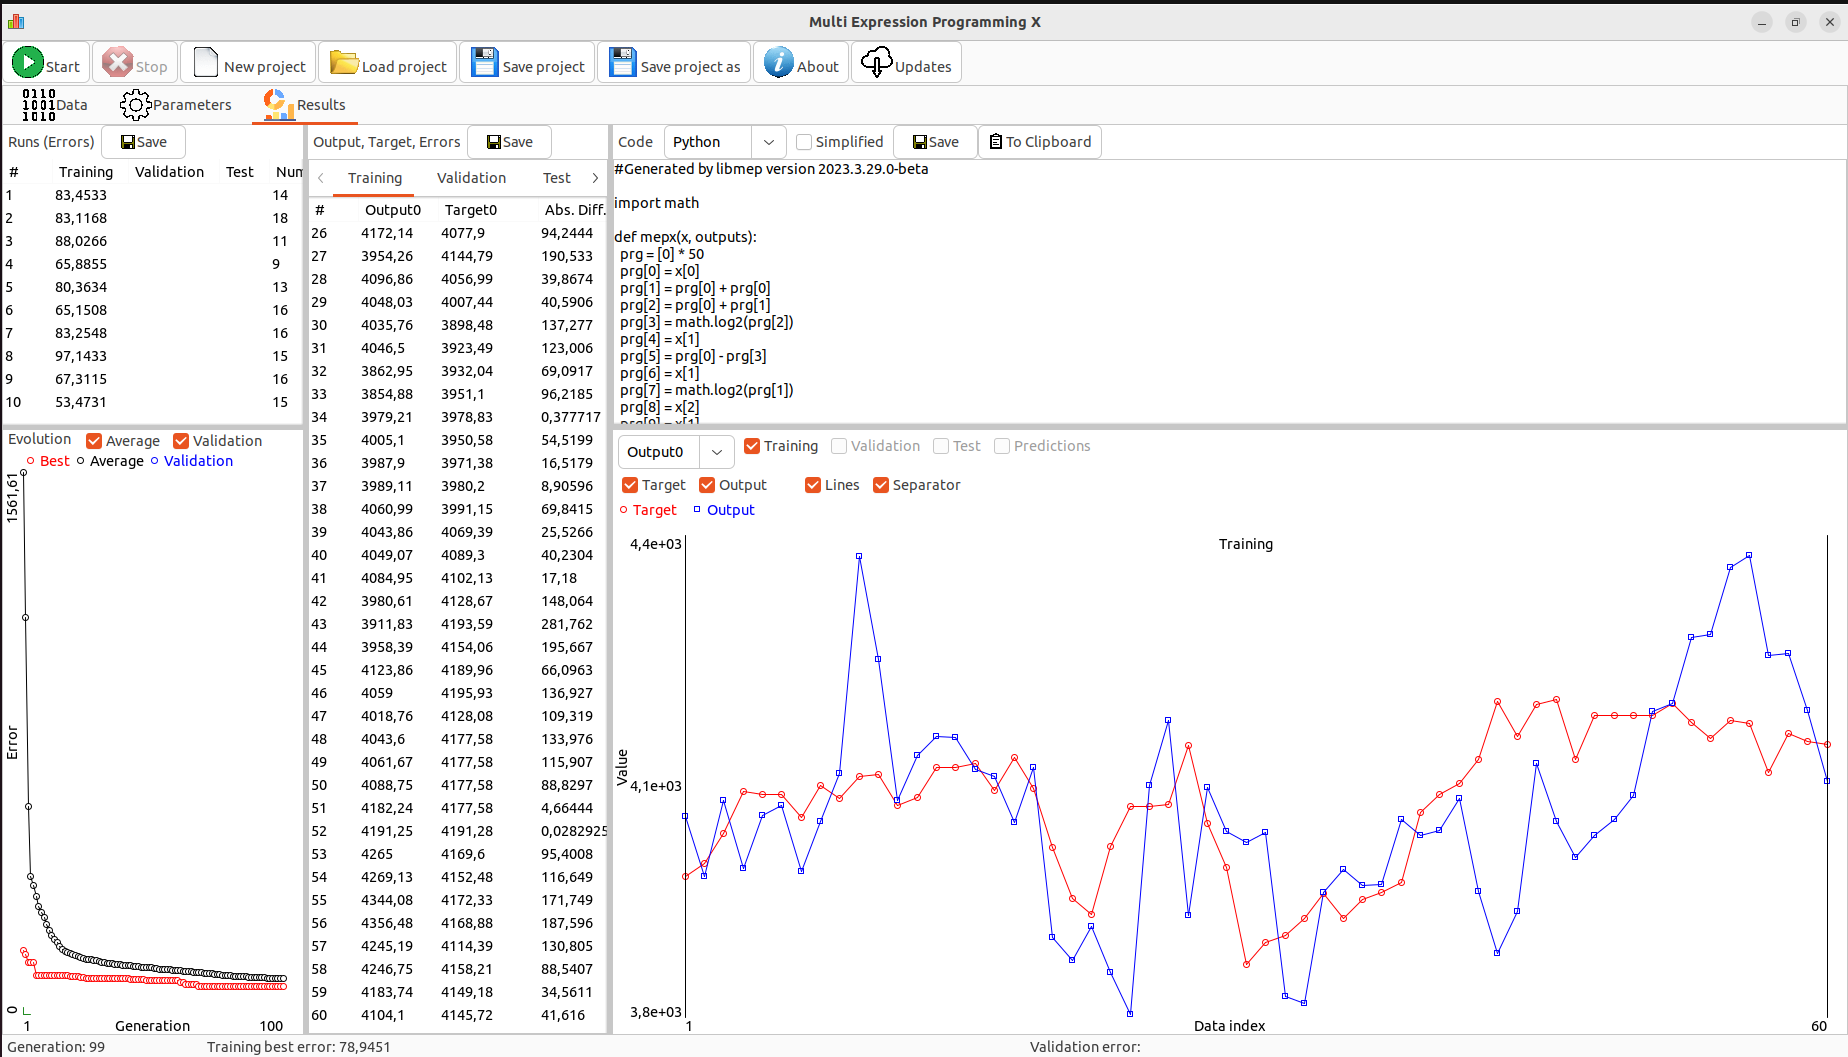

4. Suponga que desea utilizar Programación Genética para encontrar el diseño de un circuito
lógico, tome como, ejemplo el codificador de 7 segmentos. Describa el conjunto de
terminales, el conjunto de funciones y la función de aptitud. Use una librería de Python.

In [2]:
import numpy as np
import csv

def read_csv(file_name):
    inputs = np.zeros((8, 3))
    expected_outputs = np.zeros((8, 8))
    numbers = np.zeros((8, 1))

    with open(file_name, newline='') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)  # Skip the header row

        for i, row in enumerate(reader):
            if i < 10:
                inputs[i, :] = np.flip(np.array(row[:3]))
                expected_outputs[i, :] = np.array(row[3:11])
                numbers[i, 0] = np.array(row[11])

    return inputs.astype(bool), expected_outputs.astype(bool), numbers

In [3]:
path = 'Codificador_Segmentos7.csv'                            # Archivo csv con tabla de verdad
inputs, exp_out, num = read_csv(path)   

In [4]:
exp_out

array([[False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False,  True, False],
       [False, False, False, False, False,  True, False, False],
       [False, False, False, False,  True, False, False, False],
       [False, False, False,  True, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False]])

In [5]:
class Node:
    def __init__(self, value=None, operation=None):
        self.value = value
        self.operation = operation
        self.left = None
        self.right = None

def evaluate_tree(root):
    if root is None:
        return None

    if root.operation is None:
        # Es una hoja con un valor binario (0 o 1)
        return root.value[1]
    elif root.operation == "AND":
        left_result = evaluate_tree(root.left)
        right_result = evaluate_tree(root.right)
        return left_result and right_result
    elif root.operation == "OR":
        left_result = evaluate_tree(root.left)
        right_result = evaluate_tree(root.right)
        return left_result or right_result
    elif root.operation == "NOT":
        child_result = evaluate_tree(root.left)
        return not child_result
    else:
        raise ValueError("Operación no válida")

def preorder_labels(root):
    labels = []

    def preorder_helper(node):
        if node is None:
            return
        if node.value is not None:
            labels.append(node.value[0])
        if node.operation is not None:
            labels.append(node.operation)
        preorder_helper(node.left)
        preorder_helper(node.right)

    preorder_helper(root)
    return labels

In [6]:
# Construct the tree
root = Node(operation="AND")
root.left = Node(operation="AND")
root.left.left = Node(value=('I0', 1))
root.left.right = Node(value=('I1', 1))
root.right = Node(value=('I2', 1))

# Get the list of labels in preorder
labels_preorder = preorder_labels(root)

# Print the list of labels
print("Labels in preorder:", labels_preorder)

result = evaluate_tree(root)

print("Resultado:", int(result))

Labels in preorder: ['AND', 'AND', 'I0', 'I1', 'I2']
Resultado: 1


In [7]:
result_out = [[] for _ in range(8)]
for input in inputs:
    root_out7 = Node(operation="AND")
    root_out7.left = Node(operation="AND")
    root_out7.left.left = Node(value=('I0', input[0]))
    root_out7.left.right = Node(value=('I1', input[1]))
    root_out7.right = Node(value=('I2', input[2]))

    result_out[7].append(evaluate_tree(root_out7))
    
    root_out6 = Node(operation="AND")
    root_out6.left = Node(operation="AND")
    root_out6.left.left = Node(operation="NOT")
    root_out6.left.left.left = Node(value=('I0', input[0]))
    root_out6.left.right = Node(value=('I1', input[1]))
    root_out6.right = Node(value=('I2', input[2]))

    result_out[6].append(evaluate_tree(root_out6))

    root_out5 = Node(operation="AND")
    root_out5.left = Node(operation="AND")
    root_out5.left.left = Node(value=('I0', input[0]))
    root_out5.left.right = Node(operation="NOT")
    root_out5.left.right.left = Node(value=('I1', input[1]))
    root_out5.right = Node(value=('I2', input[2]))

    result_out[5].append(evaluate_tree(root_out5))

    root_out4 = Node(operation="AND")
    root_out4.left = Node(operation="AND")
    root_out4.left.left = Node(operation="NOT")
    root_out4.left.left.left = Node(value=('I0', input[0]))
    root_out4.left.right = Node(operation="NOT")
    root_out4.left.right.left = Node(value=('I1', input[1]))
    root_out4.right = Node(value=('I2', input[2]))

    result_out[4].append(evaluate_tree(root_out4))

    root_out3 = Node(operation="AND")
    root_out3.left = Node(operation="AND")
    root_out3.left.left = Node(value=('I0', input[0]))
    root_out3.left.right = Node(value=('I1', input[1]))
    root_out3.right = Node(operation="NOT")
    root_out3.right.left = Node(value=('I2', input[2]))

    result_out[3].append(evaluate_tree(root_out3))

    root_out2 = Node(operation="AND")
    root_out2.left = Node(operation="AND")
    root_out2.left.left = Node(operation="NOT")
    root_out2.left.left.left = Node(value=('I0', input[0]))
    root_out2.left.right = Node(value=('I1', input[1]))
    root_out2.right = Node(operation="NOT")
    root_out2.right.left = Node(value=('I2', input[2]))

    result_out[2].append(evaluate_tree(root_out2))

    root_out1 = Node(operation="AND")
    root_out1.left = Node(operation="AND")
    root_out1.left.left = Node(value=('I0', input[0]))
    root_out1.left.right = Node(operation="NOT")
    root_out1.left.right.left = Node(value=('I1', input[1]))
    root_out1.right = Node(operation="NOT")
    root_out1.right.left = Node(value=('I2', input[2]))

    result_out[1].append(evaluate_tree(root_out1))

    root_out0 = Node(operation="AND")
    root_out0.left = Node(operation="AND")
    root_out0.left.left = Node(operation="NOT")
    root_out0.left.left.left = Node(value=('I0', input[0]))
    root_out0.left.right = Node(operation="NOT")
    root_out0.left.right.left = Node(value=('I1', input[1]))
    root_out0.right = Node(operation="NOT")
    root_out0.right.left = Node(value=('I2', input[2]))

    result_out[0].append(evaluate_tree(root_out0))

In [8]:
print(f'I0 I1 I2 O7 O6 O5 O4 O3 O2 O1 O0')
for _ in range(8):
    print(f'{int(inputs[_][0])}  {int(inputs[_][1])}  {int(inputs[_][2])}  {int(result_out[7][_])}  {int(result_out[6][_])}  {int(result_out[5][_])}  {int(result_out[4][_])}  {int(result_out[3][_])}  {int(result_out[2][_])}  {int(result_out[1][_])}  {int(result_out[0][_])}')

I0 I1 I2 O7 O6 O5 O4 O3 O2 O1 O0
0  0  0  0  0  0  0  0  0  0  1
1  0  0  0  0  0  0  0  0  1  0
0  1  0  0  0  0  0  0  1  0  0
1  1  0  0  0  0  0  1  0  0  0
0  0  1  0  0  0  1  0  0  0  0
1  0  1  0  0  1  0  0  0  0  0
0  1  1  0  1  0  0  0  0  0  0
1  1  1  1  0  0  0  0  0  0  0


In [9]:
def aptitude_func(exp_out, result_out):
    apt = np.zeros((1,8), float)
    for i in range(8):
        exp_res = [out[i] for out in exp_out[::-1]]
        apt[0,i] = (10/1.4**sum(list(map(lambda x, y: x^y, exp_res, result_out[i]))))
    return apt

In [10]:
aptitude_func(exp_out, result_out)

array([[10., 10., 10., 10., 10., 10., 10., 10.]])

In [11]:
import random

# Define the Node class as before

def create_random_program():
    root = Node()
    root.operation = random.choice(["AND", "OR", "NOT"])
    root.left = create_random_subprogram()
    root.right = create_random_subprogram()
    return root

def create_random_subprogram():
    if random.random() < 0.65:  # 50% chance to create a terminal
        variable = random.choice(['I0', 'I1', 'I2'])
        return Node(value=(variable, None))  # Assign None as the initial value
    else:
        subprogram = Node()
        subprogram.operation = random.choice(["AND", "OR", "NOT"])
        subprogram.left = create_random_subprogram()
        subprogram.right = create_random_subprogram()
        return subprogram

def assign_input_values(program, input_data):
    # Recursively assign input values to the variables in the program
    if program is None:
        return
    if program.value is not None:
        variable = program.value[0]
        if variable == 'I0':
            program.value = ('I0', input_data[0])
        elif variable == 'I1':
            program.value = ('I1', input_data[1])
        elif variable == 'I2':
            program.value = ('I2', input_data[2])
    assign_input_values(program.left, input_data)
    assign_input_values(program.right, input_data)

# Parameters
population_size = 10  # Adjust the population size as needed

# Generate the initial population of programs
initial_population = [create_random_program() for _ in range(population_size)]

# Assign input values to the variables in each program
result_out = [[[] for _ in range(8)] for i in range(10)]

for idx, input_data in enumerate(inputs):
    print(input_data)
    for program in initial_population:
        assign_input_values(program, input_data)
    # Print the initial population (you can customize this for your needs)
    for i, program in enumerate(initial_population):
        print(f"Program {i + 1}:")
        # You can print the program structure here using a similar approach as before
        print(preorder_labels(program))
        print(evaluate_tree(program))
        # Aptitude for O7
        result_out[i-1][idx] = evaluate_tree(program)


[False False False]
Program 1:
['OR', 'I0', 'I1']
False
Program 2:
['NOT', 'NOT', 'I1', 'OR', 'I1', 'AND', 'I0', 'OR', 'I2', 'I1', 'I1']
False
Program 3:
['AND', 'I2', 'I0']
False
Program 4:
['OR', 'I2', 'I0']
False
Program 5:
['AND', 'I1', 'NOT', 'I2', 'OR', 'I1', 'AND', 'I1', 'I1']
False
Program 6:
['OR', 'NOT', 'I0', 'AND', 'AND', 'OR', 'I2', 'I2', 'OR', 'I1', 'AND', 'OR', 'I0', 'OR', 'AND', 'I1', 'I0', 'I2', 'I1', 'I1', 'I1']
True
Program 7:
['NOT', 'OR', 'NOT', 'OR', 'NOT', 'OR', 'OR', 'I2', 'I1', 'I0', 'I0', 'I0', 'NOT', 'I1', 'I2', 'I0', 'NOT', 'AND', 'I2', 'AND', 'I1', 'NOT', 'I2', 'I1', 'I2']
True
Program 8:
['NOT', 'I0', 'I0']
True
Program 9:
['AND', 'I0', 'I2']
False
Program 10:
['AND', 'OR', 'I1', 'I0', 'I2']
False
[ True False False]
Program 1:
['OR', 'I0', 'I1']
True
Program 2:
['NOT', 'NOT', 'I1', 'OR', 'I1', 'AND', 'I0', 'OR', 'I2', 'I1', 'I1']
False
Program 3:
['AND', 'I2', 'I0']
False
Program 4:
['OR', 'I2', 'I0']
True
Program 5:
['AND', 'I1', 'NOT', 'I2', 'OR', 'I1',

In [12]:
result_out

[[False, False, True, True, False, False, True, True],
 [False, False, False, False, False, True, False, True],
 [False, True, False, True, True, True, True, True],
 [False, False, True, True, False, False, False, False],
 [True, False, True, True, True, False, True, True],
 [True, False, False, False, False, False, False, False],
 [True, False, True, False, True, False, True, False],
 [False, False, False, False, False, True, False, True],
 [False, False, False, False, False, True, True, True],
 [False, True, True, True, False, True, True, True]]

In [13]:
def aptitude_func(exp_res, result_out):
    apt = (10/1.4**sum(list(map(lambda x, y: x^y, exp_res, result_out))))
    return apt

In [14]:
exp_res = [out[1] for out in exp_out[::-1]]
for result in result_out:
    print(aptitude_func(exp_res, result))

1.859344320818707
3.6443148688046656
1.859344320818707
3.6443148688046656
0.9486450616421976
5.102040816326531
1.859344320818707
3.6443148688046656
2.6030820491461895
1.859344320818707


5. Suponga que tiene un robot que le entrega galletas al grupo de ingenieros de diseño de
robots. Programe por PG el recorrido del robot, teniendo en cuenta que cada vez que un
ingeniero recibe una galleta gana puntos. Los ingenieros están distribuidos en una sala
cuadrada. Defina, conjunto de terminales, conjunto de funciones y función de aptitud.

6. Lea el artículo referenciado en [11], haga un resumen de un par de hojas y obtenga unas
conclusiones del uso de PG en la programación de máquinas.